In [1]:
import numpy as np
from qepy.io import QEInput
from qepy.driver import Driver
#from ase.io.trajectory import Trajectory
from ase.io.trajectory import Trajectory
from ase.build import bulk
from ase import Atoms
import matplotlib.pyplot as plt

In [2]:
from ase.units import kJ
from ase.eos import EquationOfState

In [3]:
atoms = bulk('Li', 'bcc', 3.51)

In [4]:
qe_options = {
    '&control': {
        'calculation': "'scf'",
        'prefix': "'oepp'",
        'pseudo_dir': "'/projectsn/mp1009_1/Valeria/Batteries/Li2S_interface/OF/PP/'"},
    '&system': {
        'ibrav' : 0,
        'degauss': 0.02,
        'input_dft': "'pbe'",
        'ecutwfc': 80,
        'occupations': "'smearing'",
        'smearing': "'fermi-dirac'" 
    },
    '&electrons': {
        'conv_thr' : 1.0e-10,
        'mixing_beta': 0.3,},
     'atomic_species': ['Li 6.94 Li_OEPP_PZ.UPF'],
     'k_points automatic': ['4 4 4 0 0 0'],
}

In [5]:
alats = [0.8,0.85,0.9,0.95,0.975,1.0,1.025,1.05,1.075,1.1,1.15,1.2]
ks_ene = []
ks_rho = []
vol = []
atoms = bulk('Li', 'bcc', 3.51)
for x in alats:
    print(x)
    ta=atoms.copy()
    ta.cell *= x
    qe_options = QEInput.update_atoms(ta, qe_options = qe_options,  extrapolation=False)
    QEInput().write_qe_input('qe/'+str(x)+'.in', qe_options=qe_options)
    driver = Driver('qe/'+str(x)+'.in', logfile='qe/'+str(x)+'.out')
    driver.scf()
    ene = driver.get_energy()
    driver.stop()
    ks_ene.append(ene)
    vol.append(ta.get_volume())

ee=np.array(ks_ene)
vv=np.asarray(vol)
np.save('energy.npy', ee)
np.save('volume.npy', vv)

0.8
0.85
0.9
0.95
0.975
1.0
1.025
1.05
1.075
1.1
1.15
1.2


In [6]:
ee_eos= EquationOfState(vv/1, ee*27.211385/2, eos='murnaghan') 
vv0, ee0, B = ee_eos.fit()
eos = [ vv0, ee0, B / kJ * 1.0e24]

<AxesSubplot: title={'center': 'murnaghan: E: -9.239 eV, V: 20.218 Å$^3$, B: 11.442 GPa'}, xlabel='volume [Å$^3$]', ylabel='energy [eV]'>

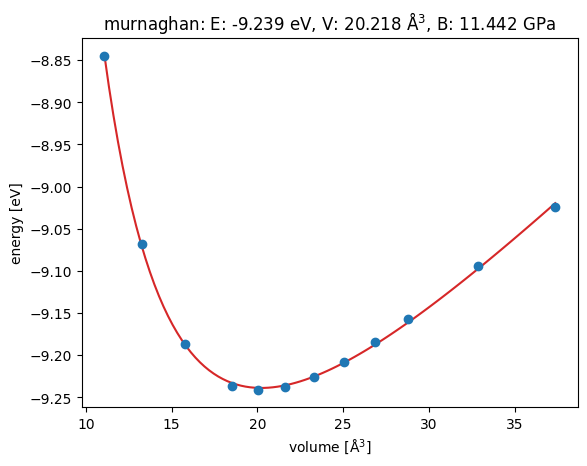

In [7]:
ee_eos.plot()

In [8]:
# Batteries/Li2S_interface/OF/Li/metal/PP/OEPP/LDA/tf02vw/lda_tf02vw.psp8

In [9]:
from dftpy.ions import Ions
from dftpy.field import DirectField
from dftpy.grid import DirectGrid
from dftpy.functional import LocalPseudo, Functional, TotalFunctional
from dftpy.formats import io
from dftpy.optimization import Optimization
from dftpy.mpi import sprint
from dftpy.functional.pseudo.psp import PSP
from dftpy.constants import environ
from ase.build import bulk
import numpy as np
from scipy.optimize import minimize
from scipy.signal import quadratic
from dftpy.api.api4ase import DFTpyCalculator
from dftpy.config import DefaultOption, OptionFormat

In [12]:
pwd

'/projectsn/mp1009_1/Valeria/Batteries/Li2S_interface/OF/Li/metal/PP/OEPP/PBE/revhc'

In [14]:
e_revhc = []
v_revhc = []
for alat in alats: 
    atoms = bulk('Li', 'bcc', 3.51)
    conf = DefaultOption()
    conf['PATH']['pppath'] = '/projectsn/mp1009_1/Valeria/Batteries/Li2S_interface/OF/Li/metal/PP/OEPP/PBE/revhc/'
    conf['PP']['Li'] = 'li_pbe_revhc.psp8'
    conf['OPT']['method'] = 'CG'
    conf['KEDF']['kedf'] = 'revHC'
    conf['EXC']['xc'] = 'PBE'
    conf['JOB']['calctype'] = 'Energy Force'
    conf['OPT']['econv'] = 1.e-11
    conf['GRID']['ecut'] = 1600
    conf = OptionFormat(conf)
    calc = DFTpyCalculator(config=conf)
    atoms.set_calculator(calc)
    tta=atoms.copy()   
    tta.cell *= alat
    tta.set_calculator(calc)
    e_revhc.append(tta.get_potential_energy())
    v_revhc.append(tta.get_volume())

e_revhc=np.array(e_revhc)
v_revhc=np.asarray(v_revhc)
np.save('energy_revhc.npy', e_revhc)
np.save('volume_revhc.npy', v_revhc)

The final grid size is  [16 16 16]
setting key: Li -> /projectsn/mp1009_1/Valeria/Batteries/Li2S_interface/OF/Li/metal/PP/OEPP/PBE/revhc//li_pbe_revhc.psp8


/tmp/ipykernel_14908/2113873995.py:16: DeprecationWarning: Please use atoms.calc = calc
  atoms.set_calculator(calc)
/tmp/ipykernel_14908/2113873995.py:19: DeprecationWarning: Please use atoms.calc = calc
  tta.set_calculator(calc)


Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.610567299805E-01     -2.610567E-01   3.870748E-03    1       1       1.349463E-01    
1       -2.614578899857E-01     -4.011600E-04   1.736315E-03    1       2       3.728170E-01    
2       -2.616898055913E-01     -2.319156E-04   8.750691E-03    1       3       6.245842E-01    
3       -2.618554205291E-01     -1.656149E-04   7.915807E-03    1       2       8.681118E-01    
4       -2.620021637273E-01     -1.467432E-04   7.998594E-03    1       2       1.115507E+00    
5       -2.621009716042E-01     -9.880788E-05   7.865810E-03    1       2       1.375813E+00    
6       -2.621638658611E-01     -6.289426E-05   9.845536E-03    1       2       1.612986E+00    
7       -2.622212002959E-01     -5.733443E-05   5.025257E-03    1       2       1.858332E+00    
8       -2.622651250807E-01     -4.392478E-05   4.993049E-03    1       2       2.022247E+00    
9       -2.623070079846E-01   

In [22]:
eos_revhc= EquationOfState(v_revhc/1, e_revhc, eos='murnaghan') 
v0_revhc, e0_revhc, B_revhc = eos_revhc.fit()
eos = [ vv0, ee0, B / kJ * 1.0e24]

<AxesSubplot: title={'center': 'murnaghan: E: -7.422 eV, V: 21.310 Å$^3$, B: 12.192 GPa'}, xlabel='volume [Å$^3$]', ylabel='energy [eV]'>

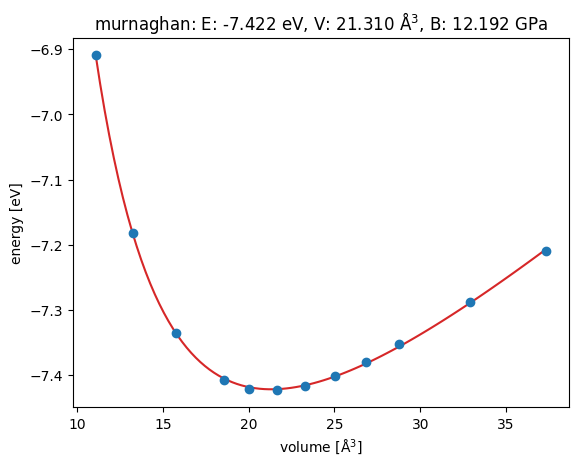

In [13]:
eos_revhc.plot()

In [15]:
e_tf02vw = []
v_tf02vw = []
for alat in alats: 
    print(alat)
    atoms = bulk('Li', 'bcc', 3.51)
    conf = DefaultOption()
    conf['PATH']['pppath'] = '/projectsn/mp1009_1/Valeria/Batteries/Li2S_interface/OF/Li/metal/PP/OEPP/PBE/revhc/'
    conf['PP']['Li'] = 'li_pbe_revhc.psp8'
    conf['OPT']['method'] = 'CG'
    conf['KEDF']['kedf'] = 'TFvW'
    conf['KEDF']['y'] = 0.2
    conf['EXC']['xc'] = 'PBE'
    conf['JOB']['calctype'] = 'Energy Force'
    conf['OPT']['econv'] = 1.e-11
    conf['GRID']['ecut'] = 1600
    conf = OptionFormat(conf)
    calc = DFTpyCalculator(config=conf)
    atoms.set_calculator(calc)
    tta=atoms.copy()   
    tta.cell *= alat
    tta.set_calculator(calc)
    e_tf02vw.append(tta.get_potential_energy())
    v_tf02vw.append(tta.get_volume())

e_tf02vw=np.array(e_tf02vw)
v_tf02vw=np.asarray(v_tf02vw)
np.save('energy_tf02vw.npy', e_tf02vw)
np.save('volume_tf02vw.npy', v_tf02vw)

0.8
The final grid size is  [16 16 16]
setting key: Li -> /projectsn/mp1009_1/Valeria/Batteries/Li2S_interface/OF/Li/metal/PP/OEPP/PBE/revhc//li_pbe_revhc.psp8


/tmp/ipykernel_14908/3921837435.py:18: DeprecationWarning: Please use atoms.calc = calc
  atoms.set_calculator(calc)
/tmp/ipykernel_14908/3921837435.py:21: DeprecationWarning: Please use atoms.calc = calc
  tta.set_calculator(calc)


Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.610567299805E-01     -2.610567E-01   3.870748E-03    1       1       2.733183E-02    
1       -2.626959079240E-01     -1.639178E-03   1.234226E-03    1       2       5.083084E-02    
2       -2.631185782359E-01     -4.226703E-04   3.012293E-03    1       3       8.972049E-02    
3       -2.633788971869E-01     -2.603190E-04   4.034905E-03    1       3       1.235721E-01    
4       -2.635708150420E-01     -1.919179E-04   3.354191E-03    1       3       1.416652E-01    
5       -2.637164790216E-01     -1.456640E-04   2.188309E-03    1       3       1.600447E-01    
6       -2.637965392017E-01     -8.006018E-05   1.209449E-03    1       3       1.783907E-01    
7       -2.638430054106E-01     -4.646621E-05   7.916383E-04    1       3       1.964800E-01    
8       -2.638712434852E-01     -2.823807E-05   4.534461E-04    1       3       2.146976E-01    
9       -2.638916470057E-01   

<AxesSubplot: title={'center': 'murnaghan: E: -7.587 eV, V: 20.654 Å$^3$, B: 10.264 GPa'}, xlabel='volume [Å$^3$]', ylabel='energy [eV]'>

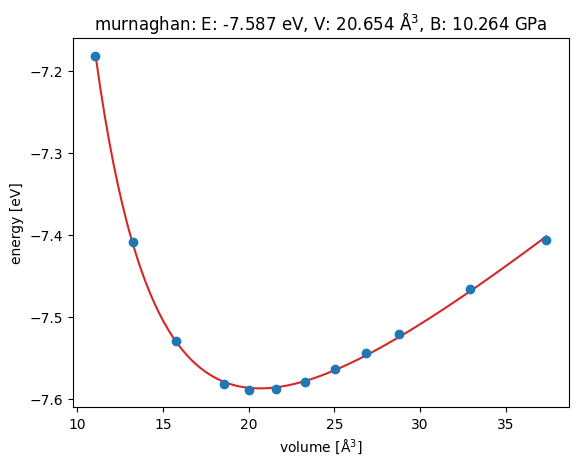

In [16]:
eos_tf02vw= EquationOfState(v_tf02vw/1, e_tf02vw, eos='murnaghan') 
v0_tf02vw, e0_tf02vw, B_tf02vw = eos_tf02vw.fit()
eos = [ vv0, ee0, B / kJ * 1.0e24]
eos_tf02vw.plot()

In [17]:
e_lmgp = []
v_lmgp = []
for alat in alats: 
    print(alat)
    atoms = bulk('Li', 'bcc', 3.51)
    conf = DefaultOption()
    conf['PATH']['pppath'] = '/projectsn/mp1009_1/Valeria/Batteries/Li2S_interface/OF/Li/metal/PP/OEPP/PBE/revhc/'
    conf['PP']['Li'] = 'li_pbe_revhc.psp8'
    conf['OPT']['method'] = 'CG'
    conf['KEDF']['kedf'] = 'LMGP'
    # conf['KEDF']['y'] = 0.2
    conf['EXC']['xc'] = 'PBE'
    conf['JOB']['calctype'] = 'Energy Force'
    conf['OPT']['econv'] = 1.e-11
    conf['GRID']['ecut'] = 1600
    conf = OptionFormat(conf)
    calc = DFTpyCalculator(config=conf)
    atoms.set_calculator(calc)
    tta=atoms.copy()   
    tta.cell *= alat
    tta.set_calculator(calc)
    e_lmgp.append(tta.get_potential_energy())
    v_lmgp.append(tta.get_volume())

e_lmgp=np.array(e_lmgp)
v_lmgp=np.asarray(v_lmgp)
np.save('energy_lmgp.npy', e_lmgp)
np.save('volume_lmgp.npy', v_lmgp)

0.8
The final grid size is  [16 16 16]
setting key: Li -> /projectsn/mp1009_1/Valeria/Batteries/Li2S_interface/OF/Li/metal/PP/OEPP/PBE/revhc//li_pbe_revhc.psp8


/tmp/ipykernel_14908/2859542569.py:18: DeprecationWarning: Please use atoms.calc = calc
  atoms.set_calculator(calc)
/tmp/ipykernel_14908/2859542569.py:21: DeprecationWarning: Please use atoms.calc = calc
  tta.set_calculator(calc)


Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.610567299805E-01     -2.610567E-01   3.870748E-03    1       1       5.667054E+00    
1       -2.614493142621E-01     -3.925843E-04   1.995796E-03    1       2       6.518536E+00    
2       -2.616578334912E-01     -2.085192E-04   7.327839E-03    1       3       7.492682E+00    
3       -2.618207474448E-01     -1.629140E-04   9.730375E-03    1       2       7.932437E+00    
4       -2.619821021526E-01     -1.613547E-04   8.517919E-03    1       2       8.371774E+00    
5       -2.620769876620E-01     -9.488551E-05   6.174438E-03    1       2       9.269027E+00    
6       -2.621358760668E-01     -5.888840E-05   7.138495E-03    1       2       1.015791E+01    
7       -2.621872677322E-01     -5.139167E-05   5.139655E-03    1       2       1.120836E+01    
8       -2.622240349401E-01     -3.676721E-05   3.415815E-03    1       2       1.227482E+01    
9       -2.622566682324E-01   

<AxesSubplot: title={'center': 'murnaghan: E: -7.561 eV, V: 20.177 Å$^3$, B: 12.737 GPa'}, xlabel='volume [Å$^3$]', ylabel='energy [eV]'>

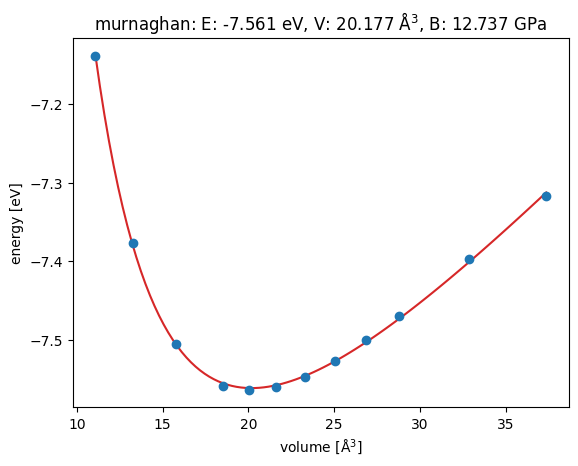

In [18]:
eos_lmgp= EquationOfState(v_lmgp/1, e_lmgp, eos='murnaghan') 
v0_lmgp, e0_lmgp, B_lmgp = eos_lmgp.fit()
eos = [ vv0, ee0, B / kJ * 1.0e24]
eos_lmgp.plot()

In [19]:
import pandas as pd

In [23]:
kedfs = ['KS', 'revHC', 'TF02vW', 'LMGP']
e0 = [ee0, e0_revhc, e0_tf02vw, e0_lmgp]
v0 = [vv0, v0_revhc, v0_tf02vw, v0_lmgp]
B0 = [B, B_revhc, B_tf02vw, B_lmgp]
eos = {}
for i,ke in enumerate(kedfs):
    eos[ke] = [v0[i], e0[i], B0[i]/ kJ * 1.0e24]

In [26]:
df = pd.DataFrame.from_dict(eos, orient='index', columns=[ 'Volume ($A^3$)', 'Energy (eV)', 'Bulk modulos (GPa)'])
df.reset_index(inplace=False)
df.rename(columns={'index': 'Element'}, inplace=True)
df.style\
    .format(precision=3, decimal=".")

,Volume ($A^3$),Energy (eV),Bulk modulos (GPa)
KS,20.218,-9.239,11.442
revHC,20.167,-7.562,12.804
TF02vW,20.654,-7.587,10.264
LMGP,20.177,-7.561,12.737


Text(0.5, 0, 'Volume ($A^{3}$)')

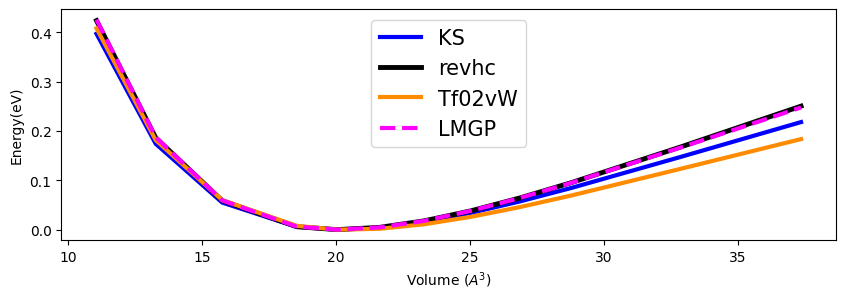

In [25]:
fig, axs = plt.subplots(1, 1, figsize=(10, 3))

plt.plot(vv, ee*27.211385/2-min(ee*27.211385/2), ls='-', lw=3,color='b',label='KS')
plt.plot(v_revhc, e_revhc-min(e_revhc), color='k', lw=3.5, label='revhc')
plt.plot(v_tf02vw, e_tf02vw-min(e_tf02vw), color='darkorange', lw=3.0, label='Tf02vW')
plt.plot(v_lmgp, e_lmgp-min(e_lmgp), ls='--', lw=3.0,color='magenta',label='LMGP')
plt.legend(fontsize=15)
plt.ylabel('Energy(eV)')
plt.xlabel('Volume ($A^{3}$)')
